In [1]:
import numpy as np
import pandas as pd
print(" sucessfully")

 sucessfully


In [2]:
df=pd.read_csv("E:\\6th semmmm\\feature engineering datasets\\outliers\\weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

In [4]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='Height'>

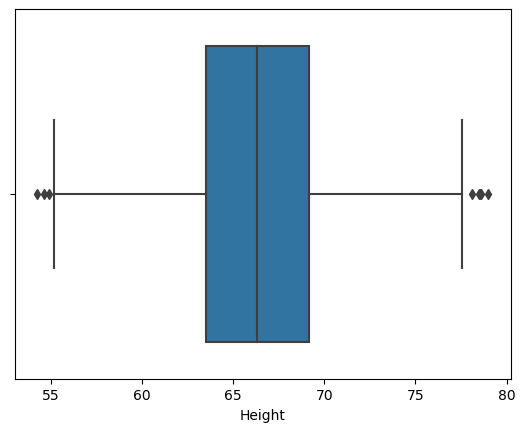

In [7]:
sns.boxplot(data=df, x=df['Height'])  # we can clearly see there is outlier in the left and the right

<AxesSubplot:xlabel='Height', ylabel='Count'>

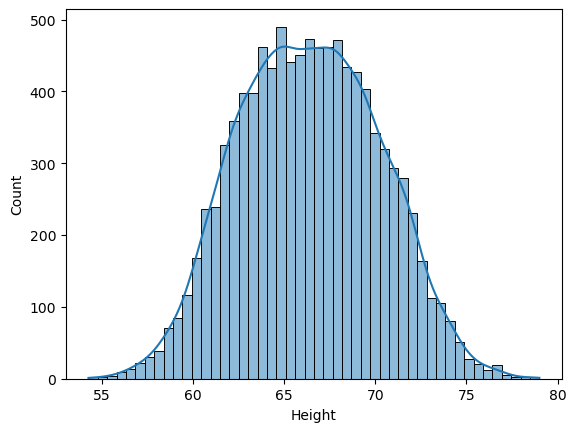

In [10]:
#  show the histogram of the data 
sns.histplot(data=df, x=df['Height'],kde=True)

In [11]:
df['Height'].skew()  # 0.04 it is near to the zeros 

0.04936908937689031

In [13]:
# we have to remove the 0.99 quantiles in the upper limit and 0.01 quntile in the left sides 
upper_limit=df['Height'].quantile(0.99)
lower_limit=df['Height'].quantile(0.01)

In [14]:
print(" upper limit ",upper_limit)
print(" lower limit ",lower_limit)

 upper limit  74.7857900583366
 lower limit  58.13441158671655


In [15]:
#vte new data frame after removbing the outliers in the hgiven datas 
new_df=df[(df['Height']<upper_limit) & (df['Height']>lower_limit)]

In [16]:
new_df.shape

(9800, 3)

In [17]:
df.shape  # there are 200 values in our outliers 

(10000, 3)

<AxesSubplot:xlabel='Height'>

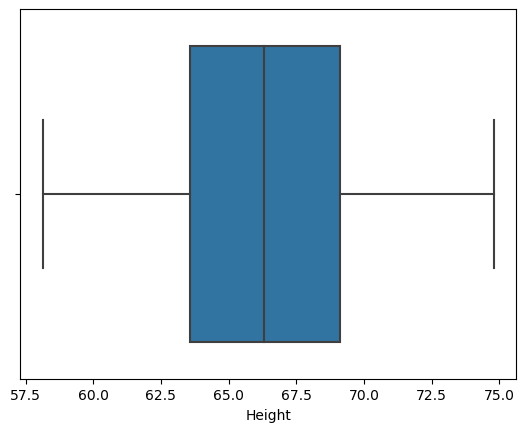

In [18]:
# plot the box plot after removing the outliers 
sns.boxplot(data=new_df, x=new_df['Height'])  # here our outliersa is com[pletely removed ]

In [19]:
df['Height'].skew()

0.04936908937689031

In [20]:
new_df['Height'].skew()

0.04308037614926446

In [21]:
df['Height'].skew()-new_df['Height'].skew()  # difference in the skewness 

0.00628871322762585

In [22]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [24]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [25]:
# we have to apply the winseriazatrion --> replace the value cpping techniques 
df['Height']=np.where(df['Height']>=upper_limit,upper_limit,
                      np.where(df['Height']<=lower_limit,lower_limit,df['Height']))

<AxesSubplot:xlabel='Height', ylabel='Count'>

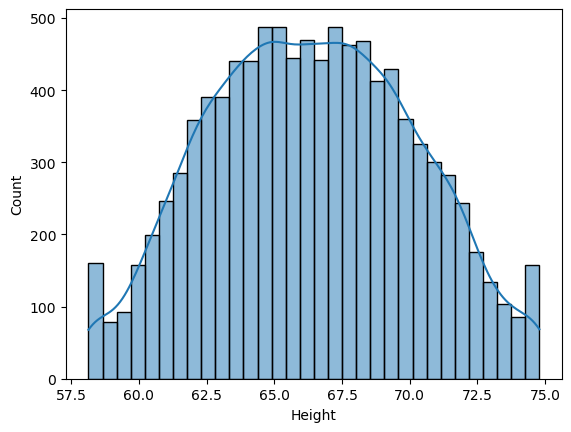

In [26]:
# now see the data after winseriazartions
sns.histplot(data=df, x=df['Height'],kde=True)  # theleft and the right values are slightly increased 

# remove the outliers in the weight columns

In [27]:
df['Weight'].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

<AxesSubplot:xlabel='Weight'>

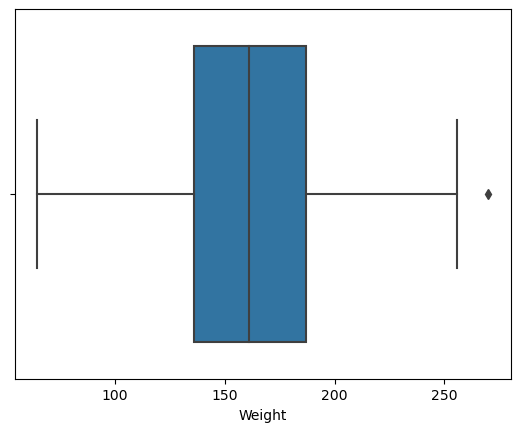

In [28]:
sns.boxplot(data=df, x=df['Weight'])  # there ios no outliers present in the weight columns 

In [29]:
df['Weight'].skew()

0.03295450444592437

<AxesSubplot:xlabel='Weight', ylabel='Count'>

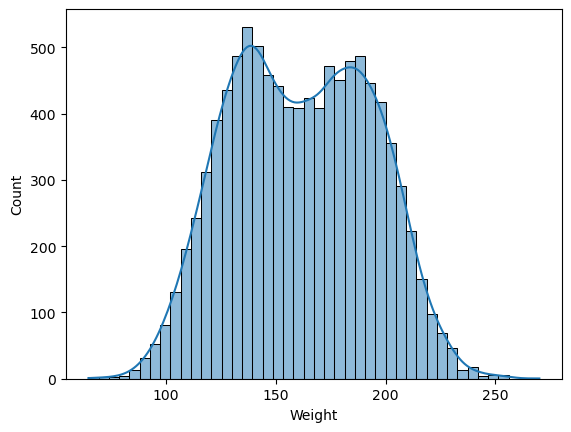

In [31]:
sns.histplot(df['Weight'],kde=True)

In [32]:
# upper limit and the lowert limits
upper_limit=df['Weight'].quantile(0.99)
lower_limit=df['Weight'].quantile(0.01)

In [33]:
print("upper limit ",upper_limit)
print("lower limit ",lower_limit)

upper limit  227.43736983602577
lower limit  97.03287365980914


In [34]:
# trimming the data , completely remove the data from the datasets 
new_df=df[(df['Weight']<upper_limit) & (df['Weight']>lower_limit)]

<AxesSubplot:xlabel='Weight'>

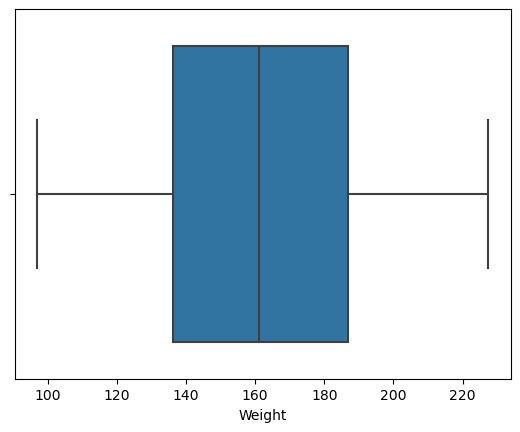

In [35]:
# distribution see
sns.boxplot(data=df, x=new_df['Weight'])  # here we remove the outlier from tjhe dtaasets 

In [37]:
# winserizarion we xcan apply in the new original datasets 
df['Weight']=np.where(df['Weight']>=upper_limit,upper_limit,
                     np.where(df['Weight']<=lower_limit,lower_limit,df['Weight']))

<AxesSubplot:xlabel='Weight', ylabel='Count'>

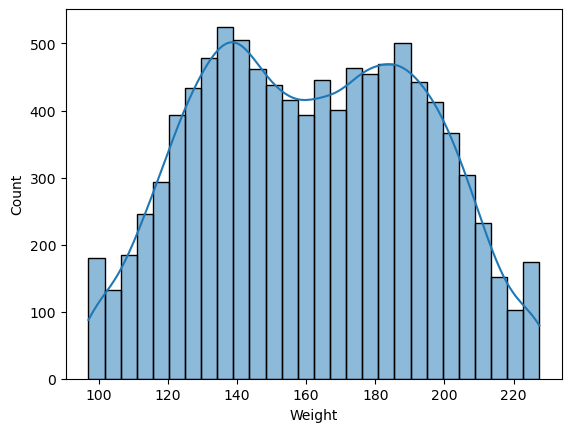

In [38]:
# now see the ddistribution plots 
sns.histplot(df['Weight'],kde=True)

In [39]:
0.03295450444592437
df['Weight'].skew()


0.023136908367701225

In [40]:
0.03295450444592437>0.023136908367701225

True